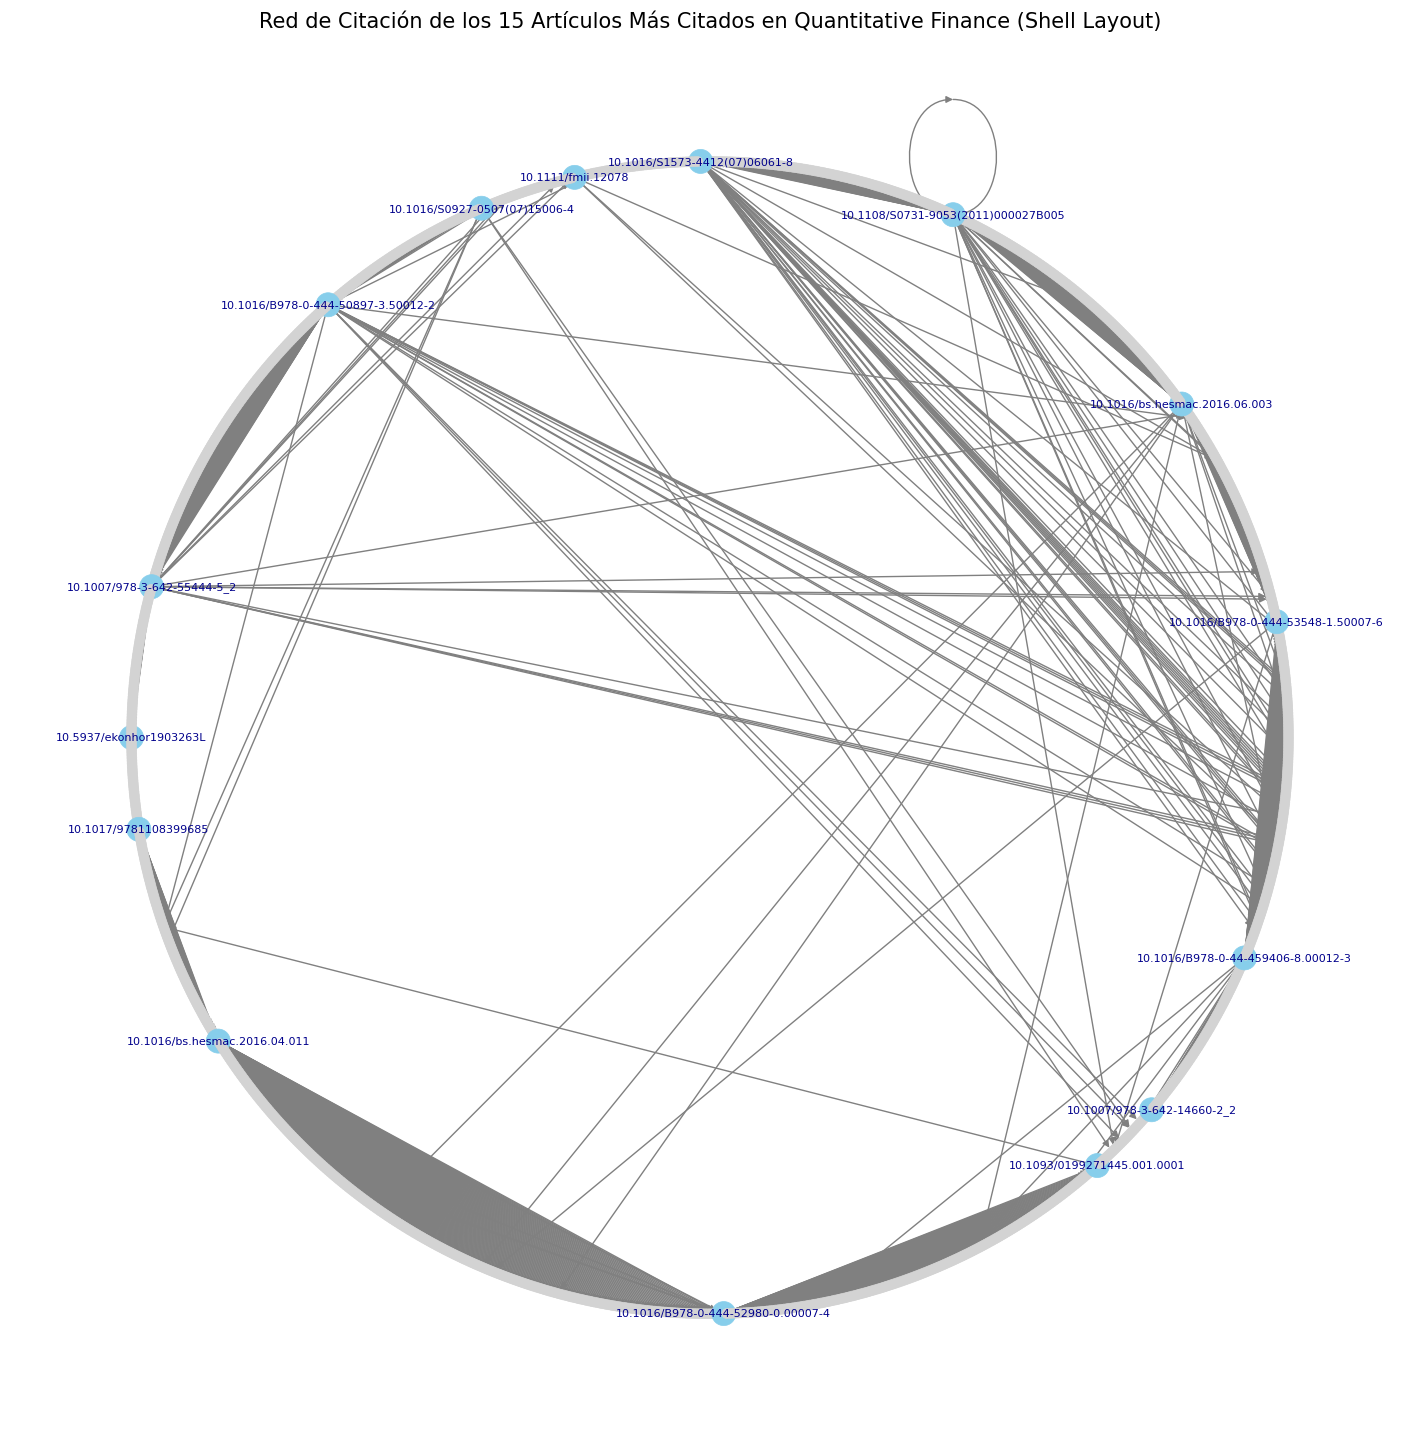

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el CSV generado previamente
df_citations = pd.read_csv('articulos_mas_citados_con_referencias.csv')

# Filtrar solo los 15 artículos más citados
df_top = df_citations.head(15)

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir nodos y aristas a la red
for index, row in df_top.iterrows():
    citing_article = row['DOI']
    cited_articles = row['Cited_DOIs']
    
    if pd.notna(cited_articles):
        cited_articles_list = eval(cited_articles)  # Convertir la lista de referencias de string a lista
        for cited_article in cited_articles_list:
            G.add_edge(citing_article, cited_article)

# Personalización de nodos y aristas
node_colors = []
node_sizes = []
labels = {}

for node in G.nodes():
    # Colorear y escalar según importancia
    if node in df_top['DOI'].values:
        node_colors.append('skyblue')  # DOIs principales
        node_sizes.append(300)  # Tamaño más grande para nodos citados
        labels[node] = node  # Etiquetas solo para los nodos principales
    else:
        node_colors.append('lightgrey')  # DOIs citados
        node_sizes.append(50)  # Tamaño pequeño para los nodos que son citas

# Dibujar el grafo con distribución Shell Layout
plt.figure(figsize=(14, 14))
pos = nx.shell_layout(G)  # Distribución Shell Layout
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color='gray', linewidths=0.5, font_size=10)

# Añadir etiquetas a los nodos principales
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='darkblue')

# Título y visualización
plt.title('Red de Citación de los 15 Artículos Más Citados en Quantitative Finance (Shell Layout)', size=15)
plt.show()
